In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [2]:
df = pd.read_csv('yt_allcountry_trenddays.csv', index_col=None)

In [3]:
df['trend_over_1_days'] = np.where(df["trend_days"]>1, 1, 0)

In [4]:
df

,Unnamed: 0,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country_code,trend_days,trend_over_5_days,trend_over_1_days
0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA,14,1,1
1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA,5,0,1
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA,7,1,1
3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA,6,1,1
4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178694,40567,DjLr06pne6Q,18.13.06,Jorja Smith Gets Ready for Bed | Beauty Secret...,Vogue,2018-06-12T13:48:29.000Z,"beauty|""beauty secrets""|""celebrity""|""celebrity...",279728,19691,135,...,https://i.ytimg.com/vi/DjLr06pne6Q/default.jpg,False,False,False,"“It’s not about looking cute,” says the rising...",Howto & Style,US,2,0,1
178695,40751,8O-ZUXGcuWU,18.14.06,Nintendo @ E3 2018: Day 2,Nintendo,2018-06-14T01:31:53.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",1549110,21905,1516,...,https://i.ytimg.com/vi/8O-ZUXGcuWU/default.jpg,False,False,False,ESRB Rating: RATING PENDING to TEEN. Rating Pe...,Gaming,US,1,0,0
178696,40752,qPEIPu0V8GQ,18.14.06,Fortnite Celebrity Pro-Am | #FortniteProAm,Fortnite,2018-06-13T03:27:30.000Z,"Fortnite|""Epic Games""|""PC""|""PS4""|""Xbox One""|""B...",2183462,79677,2034,...,https://i.ytimg.com/vi/qPEIPu0V8GQ/default.jpg,False,False,False,50 gamers and 50 celebrities will pair up to b...,Gaming,US,1,0,0
178697,40760,dS5Thrl-4Kc,18.14.06,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,2018-06-12T18:55:26.000Z,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,...,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol...",Howto & Style,US,1,0,0


In [5]:
five_days = [row for _,row in df.iterrows() if row.trend_over_5_days == 1]
print(f'Amount of videos that trend for more than five days: {len(five_days)}')

five_or_less_days = len(df) - len(five_days)
print(f'Amount of videos that trend for less than or equal to five days: {five_or_less_days}')

Amount of videos that trend for more than five days: 5336
Amount of videos that trend for less than or equal to five days: 173363


In [6]:
print(f'% of videos that trend for only 1 day = {123974 / len(df)}')
print(f'% of videos that trend for less than or eqaul to 5 day = {five_or_less_days / len(df)}')

% of videos that trend for only 1 day = 0.6937587787284764
% of videos that trend for less than or eqaul to 5 day = 0.9701397321753339


In [7]:
df_1day = df.copy()
df_1day_nostr = df_1day.drop(['Unnamed: 0','video_id','trending_date','title',
                        'channel_title', 'publish_time','tags',
                        'thumbnail_link','comments_disabled',
                        'ratings_disabled','video_error_or_removed',
                        'description','category','country_code',
                        'trend_days',
                        ],axis=1
                       )

df_1day_nostr

,views,likes,dislikes,comment_count,trend_over_5_days,trend_over_1_days
0,17158579,787425,43420,125882,1,1
1,1014651,127794,1688,13030,0,1
2,3191434,146035,5339,8181,1,1
3,2095828,132239,1989,17518,1,1
4,33523622,1634130,21082,85067,1,1
...,...,...,...,...,...,...
178694,279728,19691,135,579,0,1
178695,1549110,21905,1516,1318,0,0
178696,2183462,79677,2034,3464,0,0
178697,607422,26166,895,3517,0,0


In [8]:
df_1day_nostr = df_1day_nostr.drop(['trend_over_5_days' ] ,axis=1)
df_1day_nostr

,views,likes,dislikes,comment_count,trend_over_1_days
0,17158579,787425,43420,125882,1
1,1014651,127794,1688,13030,1
2,3191434,146035,5339,8181,1
3,2095828,132239,1989,17518,1
4,33523622,1634130,21082,85067,1
...,...,...,...,...,...
178694,279728,19691,135,579,1
178695,1549110,21905,1516,1318,0
178696,2183462,79677,2034,3464,0
178697,607422,26166,895,3517,0


In [9]:
X = df_1day_nostr.drop(['trend_over_1_days'],axis=1)
y = df_1day_nostr['trend_over_1_days']

In [10]:
X

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
178694,279728,19691,135,579
178695,1549110,21905,1516,1318
178696,2183462,79677,2034,3464
178697,607422,26166,895,3517


In [11]:
y

0         1
1         1
2         1
3         1
4         1
         ..
178694    1
178695    0
178696    0
178697    0
178698    0
Name: trend_over_1_days, Length: 178699, dtype: int32

### PCA on 4 components?

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

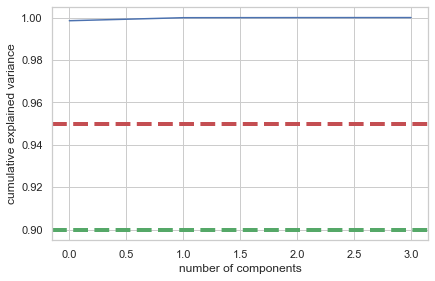

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.998518,0.998518
1,0.999936,0.001419
2,0.999983,0.000047
3,1.000000,0.000017


In [13]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.axhline(linewidth=4, color='r', linestyle = '--', y=0.95, xmin=0, xmax=1)
plt.axhline(linewidth=4, color='g', linestyle = '--', y=0.90, xmin=0, xmax=1)

display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

## X use subsets

total n = 178699

1. n = 10000
2. n = 50000
3. n = 100000

## Then Test Train split

In [14]:
X_10k = X[:10000]
X_50k = X[:50000]
X_100k = X[:100000]

y_10k = y[:10000]
y_50k = y[:50000]
y_100k = y[:100000]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(X_10k, y_10k, test_size=0.25, random_state=42)
X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(X_50k, y_50k, test_size=0.25, random_state=42)
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.25, random_state=42)

In [16]:
X_train

,views,likes,dislikes,comment_count
113617,126706,6061,64,4418
65534,14658,122,21,9
126111,9568,141,5,10
8740,32051,3006,40,665
57496,11716,2018,6,130
...,...,...,...,...
119879,7996,38,8,14
103694,78227,1082,45,356
131932,98261,501,60,23
146867,16583,177,14,33


In [17]:
X_test

,views,likes,dislikes,comment_count
117989,2592,125,2,3
101258,30968,1900,32,219
44861,39277,720,72,312
5811,77884,814,119,617
63847,136815,362,201,375
...,...,...,...,...
131037,8259,569,4,86
112353,287445,1475,133,522
75019,78071,1191,42,33
93855,88752,1043,146,118


### Classifier 1: Naive Bayes - Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [87]:
%%time
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test, y_test)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.7134191382204813
Precision Score: 0.6633935585231736
Recall Score: 0.12387238723872387
F1 Score: 0.20876336443977508
Wall time: 43 ms


In [21]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_10k, y_train_10k)

GNB_predicted = GNB.predict(X_test_10k)
GNB_precision = precision_score(y_test_10k, GNB_predicted)
GNB_recall = recall_score(y_test_10k, GNB_predicted)
GNB_f1 = f1_score(y_test_10k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.5484
Precision Score: 0.8536585365853658
Recall Score: 0.18393393393393392
F1 Score: 0.30265596046942556
Wall time: 5.51 ms


In [22]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_50k, y_train_50k)

GNB_predicted = GNB.predict(X_test_50k)
GNB_precision = precision_score(y_test_50k, GNB_predicted)
GNB_recall = recall_score(y_test_50k, GNB_predicted)
GNB_f1 = f1_score(y_test_50k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.6684
Precision Score: 0.7983014861995754
Recall Score: 0.1597620565115785
F1 Score: 0.2662418127102142
Wall time: 13 ms


In [23]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_100k, y_train_100k)

GNB_predicted = GNB.predict(X_test_100k)
GNB_precision = precision_score(y_test_100k, GNB_predicted)
GNB_recall = recall_score(y_test_100k, GNB_predicted)
GNB_f1 = f1_score(y_test_100k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.68608
Precision Score: 0.7574441687344913
Recall Score: 0.1407006222631943
F1 Score: 0.23731778425655975
Wall time: 22 ms


In [24]:
%%time
from sklearn.model_selection import cross_val_score

GNB_cvs = cross_val_score(GNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {GNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_cvs)}")

GaussianNB 10-CV score: [0.72803581 0.76373811 0.71712367 0.70246223 0.71186346 0.70878567
 0.68477896 0.6913822  0.71035255 0.70641894]
GaussianNB 10-fold Cross Val Avg: 0.7124941601507433
Wall time: 1.1 s


In [25]:
print(len(GNB.predict_proba(X_test)))
GNB_probs = GNB.predict_proba(X_test)
GNB_probs
# print(min(GNB_probs[0])

44675


array([[0.99882071, 0.00117929],
       [0.99889217, 0.00110783],
       [0.99889194, 0.00110806],
       ...,
       [0.9989038 , 0.0010962 ],
       [0.99891898, 0.00108102],
       [0.99883417, 0.00116583]])

In [26]:
GNB_probs[:,0]

array([0.99882071, 0.99889217, 0.99889194, ..., 0.9989038 , 0.99891898,
       0.99883417])

In [27]:
GNB_probs[:,1]

array([0.00117929, 0.00110783, 0.00110806, ..., 0.0010962 , 0.00108102,
       0.00116583])

In [28]:
print(f"min of left col = {min(GNB_probs[:,0])}, max of right col = {max(GNB_probs[:,1])}")
print(f"max of left col = {max(GNB_probs[:,0])}, min of right col = {min(GNB_probs[:,1])}")

min of left col = 0.0, max of right col = 1.0
max of left col = 0.9989414359562019, min of right col = 0.001058564043800917


In [29]:
len(GNB_probs[:,0])

44675

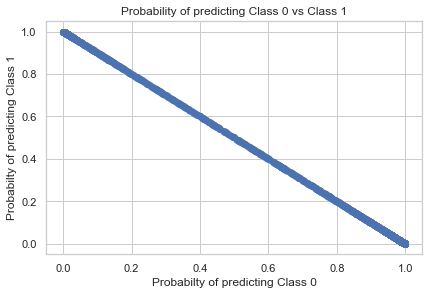

In [30]:
fig, ax = plt.subplots()
plt.scatter(GNB_probs[:,0], GNB_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 1')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [31]:
for i, val in enumerate(GNB_probs[:,0]):
    if i < 10:
        print(i, val)

0 0.998820714377994
1 0.9988921749323245
2 0.9988919360674134
3 0.9989162834227294
4 0.9989141909076792
5 0.9988706550073385
6 0.9989161951117695
7 0.9988921741953853
8 0.997053459297902
9 0.9989306738511763


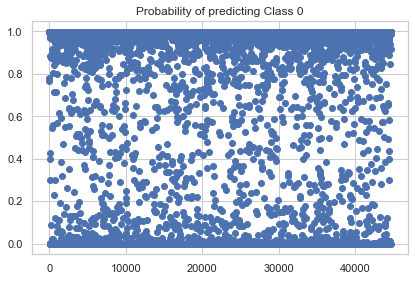

In [32]:
xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,0])
plt.title('Probability of predicting Class 0')

plt.show()

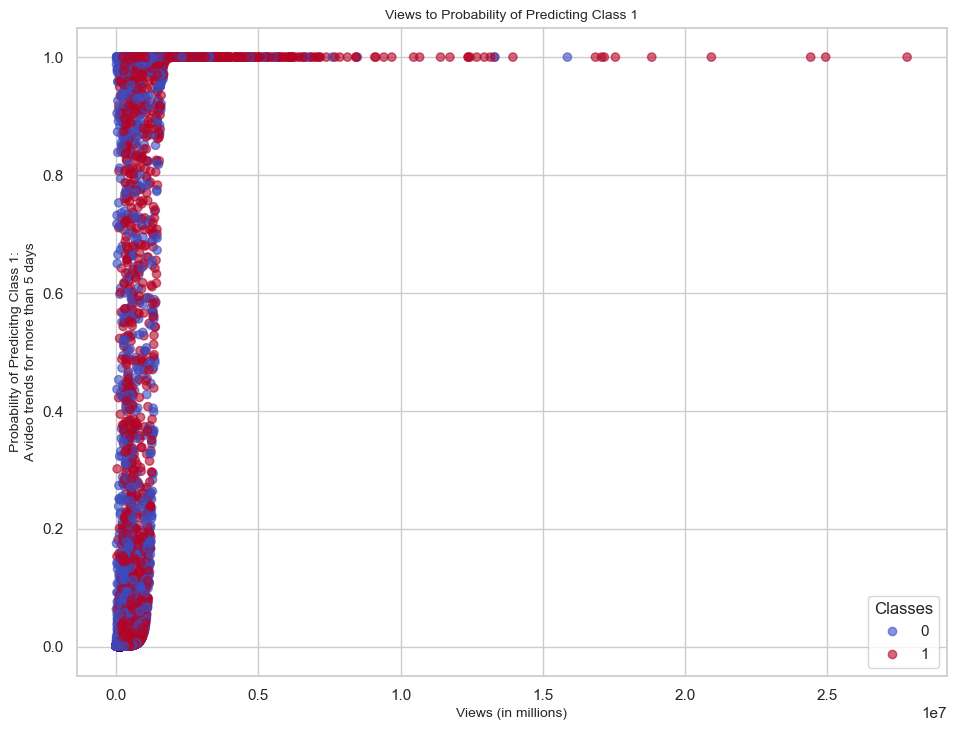

In [33]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['views'], GNB_probs[:,1], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 1', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 1:\nA video trends for more than 5 days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='lower right', title='Classes')
# ax.legend()

plt.show()

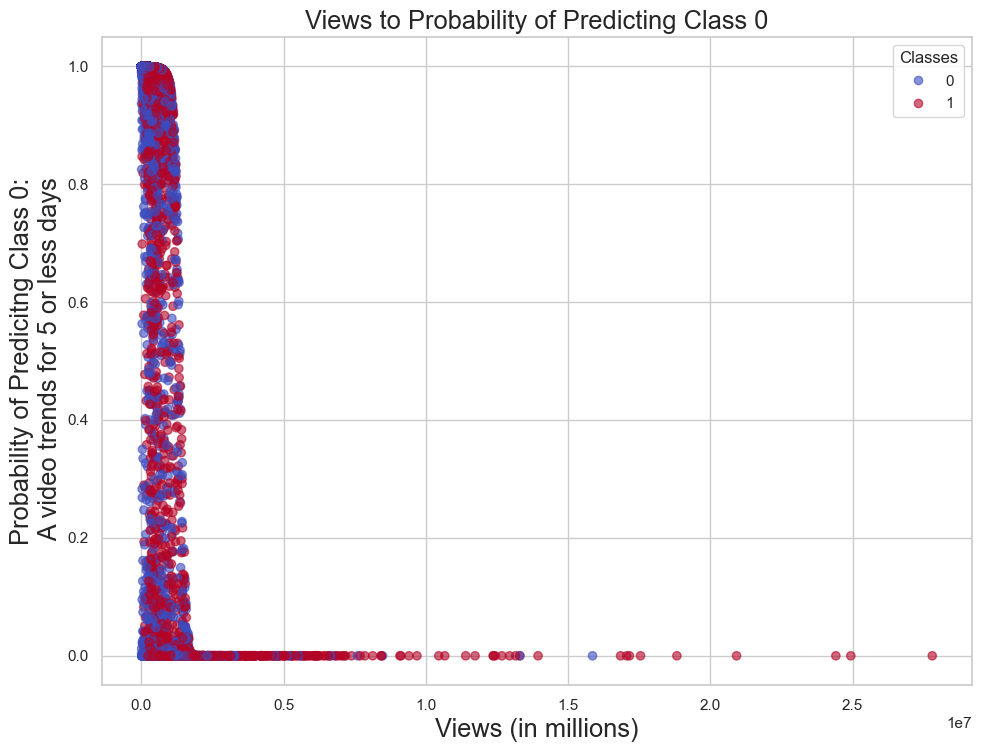

In [34]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['views'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0:\n A video trends for 5 or less days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

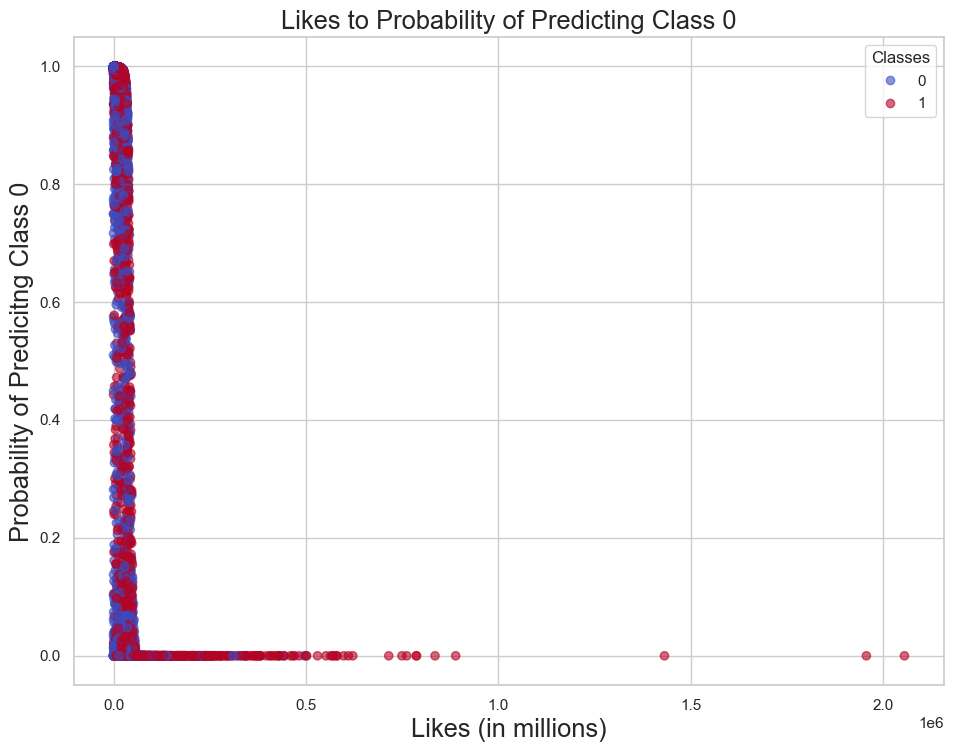

In [35]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['likes'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Likes to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Likes (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

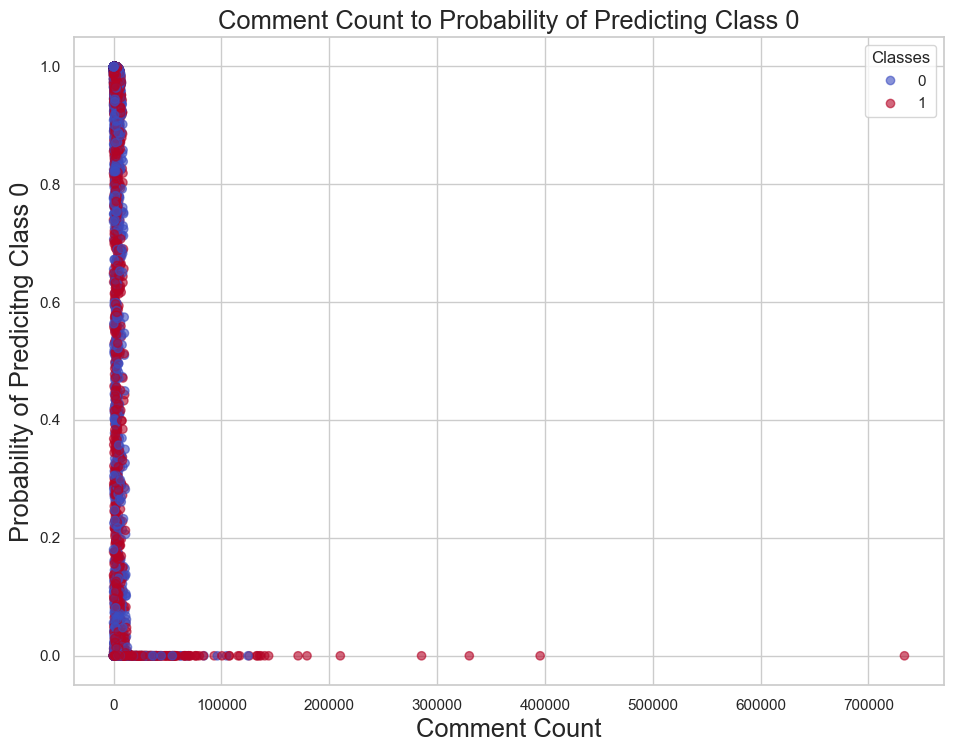

In [36]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['comment_count'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Comment Count to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Comment Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

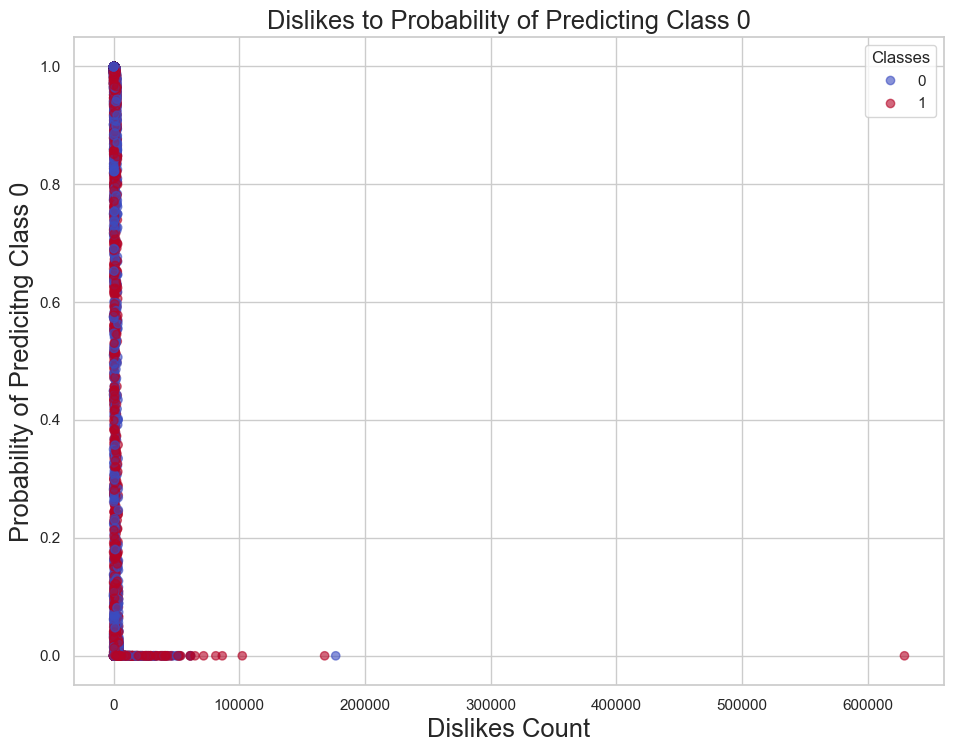

In [37]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['dislikes'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Dislikes to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Dislikes Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

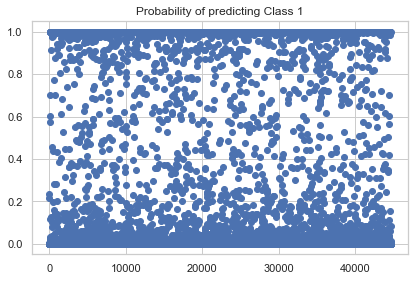

In [38]:
# xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,1])
plt.title('Probability of predicting Class 1')

plt.show()

## Histogram to show quantity of predictions to probability

In [39]:
from numpy import arange
bins = [i for i in arange(0.0, 1.0, 0.1)]
bins 

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [40]:
import numpy as np

In [41]:
bins = np.linspace(0.0,1.0, num=11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

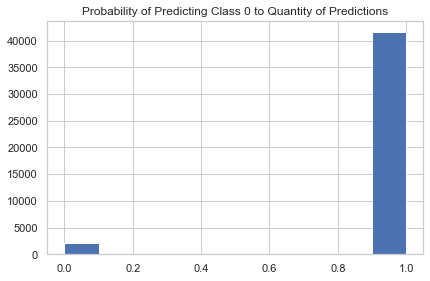

In [42]:
plt.hist(GNB_probs[:,0], bins)
plt.title('Probability of Predicting Class 0 to Quantity of Predictions')

plt.show()

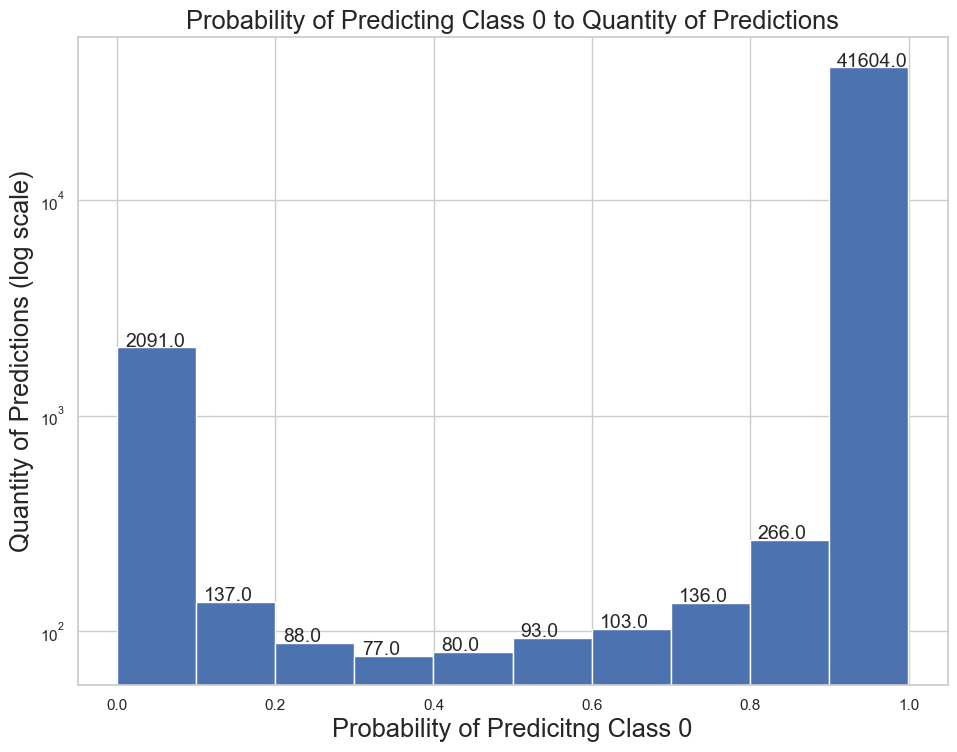

In [43]:
bins2 = 10

plt.figure(figsize=(10, 8), dpi=100)

arr = plt.hist(GNB_probs[:,0], bins2,
#                c=,
              )

# plt.ylim(0,1000)
plt.yscale('log')
plt.title('Probability of Predicting Class 0 to Quantity of Predictions',fontsize='small')
plt.xlabel('Probability of Predicitng Class 0', fontsize='small')
plt.ylabel('Quantity of Predictions (log scale)', fontsize='small')
plt.rcParams.update({'font.size': 22})

for i in range(bins2):
    plt.text(arr[1][i]+0.01,
             arr[0][i]+1,
             str(arr[0][i]), 
             fontsize=14, 
            )
    plt.text(arr[1][i],
             arr[0][i]/1.5,
             str(), 
             fontsize=14, 
            )


plt.show()

In [ ]:
arr

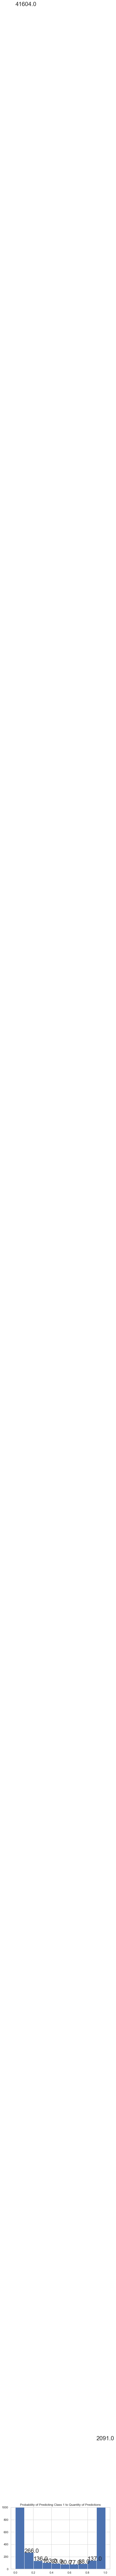

In [44]:
bins2 = 10
arr = plt.hist(GNB_probs[:,1], bins2)
plt.title('Probability of Predicting Class 1 to Quantity of Predictions')
plt.ylim(0,1000)
for i in range(bins2):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

## Calibration Curves

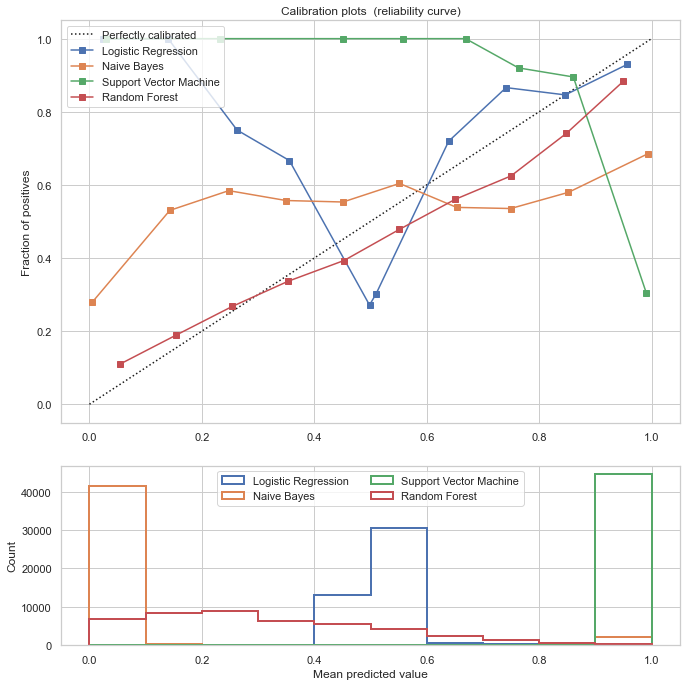

Wall time: 29.1 s


In [47]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Machine'),
                  (rfc, 'Random Forest')]:
    
#     Already trained
    clf.fit(X_train, y_train)

    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [48]:
count = 0
for val in GNB_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(GNB_probs[:,1])}")

0.9994100017254339
0.9978912887137671
1.0
1.0
0.9997548883006018
1.0
1.0
0.9113564628907194
1.0
0.9999999999999574
0.9997885463863005
1.0
0.999998744602862
1.0
1.0
1.0
0.9993280126042207
0.9806966708194085
0.9766917028975918
0.9999797804485998
1.0
0.9999997151505561
0.9999994127574344
0.9999007613321373
0.9872449277394658
0.9792793440625522
0.9999999999999716
1.0
0.9987038269103804
1.0
0.9999999999997016
0.9990318008423219
0.9955210745729145
1.0
0.9929113832595194
1.0
0.9999999999985363
0.9999999633349226
0.9999980964008159
0.9976235721346872
0.996262141069254
0.9999796009663788
0.9999999999332729
0.9996939657006568
1.0
0.9173957261125673
1.0
0.9999916376224496
0.9952418872331399
0.9434266891473988
0.9999999990564987
0.9987117118632545
1.0
0.9999999999985292
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9518724203074795
1.0
1.0
1.0
1.0
0.9720933895217299
0.9388110810885327
1.0
1.0
0.9908795829582276
1.0
0.9999996304570019
0.9999999994008917
0.9454313484920117
1.0
0.9999999997705942
1.0
1.0
1.0

In [ ]:
# fig, ax = plt.subplots()

# x_val=len(GNB_probs)

# ax.bar(x_val, GNB_probs[:,0])


# ax.set_ylabel('Probability')
# ax.set_title('Probability of x_i being in class 0')
# plt.show()

In [49]:
count = 0
for val in GNB_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

0.7814776794195267
0.7668787416468097
0.29929905255648265
0.3995555625533725
0.42783741446991147
0.5449374748057072
0.5611458180856238
0.23000820904712538
0.7165444853901082
0.30023251284599994
0.7161535135433528
0.7989809701502001
0.5686504381033065
0.6156062817541792
0.3867829620393174
0.5933443639441685
0.3183458157666849
0.4706397407287157
0.7550233614143842
0.5511579552910975
0.6866967231416238
0.7833495401243022
0.2615392884208686
0.5542740906980826
0.6396923578326964
0.354107928648771
0.6360354906620803
0.6172473148602584
0.7782557680069225
0.7041168232640046
0.6766796257790373
0.6289879979878694
0.24470970094838712
0.44916795061368386
0.5092340230119504
0.7986782056810394
0.5132736832403788
0.5151641656071504
0.6338157664612405
0.4413860899072237
0.508563217452142
0.5173447119095883
0.5190581043066753
0.6107471164527462
0.49750034752896877
0.4752619498706492
0.44290489697197144
0.37264006688759493
0.6276866712087154
0.34974248783603723
0.739333816256543
0.5391602407409781
0.432

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [51]:
 GNB.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

### Classifier 1b: Bernoulli Naive Bayes

In [52]:
%%time
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

Wall time: 17.5 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
%%time
BNB.score(X_test, y_test)

Wall time: 4.5 ms


0.6947957470621153

In [54]:
%%time
from sklearn.model_selection import cross_val_score

BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

GaussianNB 10-CV score: [0.69373251 0.69373251 0.69373251 0.69373251 0.69373251 0.69378847
 0.69378847 0.69378847 0.69378847 0.69377134]
GaussianNB 10-fold Cross Val Avg: 0.6937587787987456
Wall time: 666 ms


In [55]:
BNB_predicted = BNB.predict(X_test)
BNB_precision = precision_score(y_test, BNB_predicted)
BNB_recall = recall_score(y_test, BNB_predicted)
BNB_f1 = f1_score(y_test, BNB_predicted)

print(f'Predicted Array: {BNB_predicted}')
print(f'Precision Score: {BNB_precision}')
print(f'Recall Score: {BNB_recall}')
print(f'F1 Score: {BNB_f1}')

Predicted Array: [0 0 0 ... 0 0 0]
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


### Classifier 2: Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


Wall time: 728 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=2, warm_start=False)

In [58]:
%%time
clf_log.score(X_test,y_test)

Wall time: 3 ms


0.43773922775601565

In [59]:
# %%time
# from sklearn.model_selection import cross_val_score

# clf_log_cvs = cross_val_score(clf_log, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_log_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_log_cvs)}")

In [60]:
clf_log_predicted = clf_log.predict(X_test)
clf_log_precision = precision_score(y_test, clf_log_predicted)
clf_log_recall = recall_score(y_test, clf_log_predicted)
clf_log_f1 = f1_score(y_test, clf_log_predicted)

print(f'Predicted Array: {clf_log_predicted}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score: {clf_log_recall}')
print(f'F1 Score: {clf_log_f1}')

Predicted Array: [1 1 1 ... 1 1 1]
Precision Score: 0.31879575864680637
Recall Score: 0.7408874220755409
F1 Score: 0.4457780817686385


In [61]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_10k,y_train_10k)

clf_log_predicted = GNB.predict(X_test_10k)
clf_log_precision = precision_score(y_test_10k, clf_log_predicted)
clf_log_recall = recall_score(y_test_10k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_10k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.5336
Precision Score: 0.8405063291139241
Recall Score:    0.24924924924924924
F1 Score:        0.38448176027793857
Wall time: 318 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [62]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_50k,y_train_50k)

clf_log_predicted = GNB.predict(X_test_50k)
clf_log_precision = precision_score(y_test_50k, clf_log_predicted)
clf_log_recall = recall_score(y_test_50k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_50k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


Accuracy Score:  0.484
Precision Score: 0.7788944723618091
Recall Score:    0.1975780752071383
F1 Score:        0.315200813421454
Wall time: 721 ms


In [63]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_100k,y_train_100k)

clf_log_predicted = GNB.predict(X_test_100k)
clf_log_precision = precision_score(y_test_100k, clf_log_predicted)
clf_log_recall = recall_score(y_test_100k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_100k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


Accuracy Score:  0.4916
Precision Score: 0.7574441687344913
Recall Score:    0.1407006222631943
F1 Score:        0.23731778425655975
Wall time: 727 ms


In [ ]:
log_probs = clf_log.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(log_probs[:,0])}, max of right col = {max(log_probs[:,1])}")
print(f"max of left col = {max(log_probs[:,0])}, min of right col = {min(log_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(log_probs[:,0], log_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in log_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

In [ ]:
count = 0
for val in log_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(log_probs[:,1])}")

### Classifier 3: Support Vector Machine (SVC)

In [64]:
from sklearn.svm import SVC, LinearSVC

In [65]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train,y_train)

[LibSVM]Wall time: 25min 59s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=2)

In [66]:
%%time
clf_svm_rbf.score(X_test,y_test)

Wall time: 28.3 s


0.7181197537772803

In [ ]:
# %%time
# clf_svm_rbf_cvs = cross_val_score(clf_svm_rbf, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_svm_rbf_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_rbf_cvs)}")

In [91]:
clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test)
clf_svm_rbf_precision = precision_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test, clf_svm_rbf_predicted)

print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

Precision Score: 0.6159524297724011
Recall Score: 0.2203153648698203
F1 Score: 0.3245462402765774


In [88]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_10k, y_train_10k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_10k)
clf_svm_rbf_precision = precision_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_10k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.6348
Precision Score: 0.6789069171648164
Recall Score: 0.5968468468468469
F1 Score: 0.6352377147423094
Wall time: 3.83 s


In [89]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_50k, y_train_50k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_50k)
clf_svm_rbf_precision = precision_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_50k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.6944
Precision Score: 0.6959787892178524
Recall Score: 0.33460803059273425
F1 Score: 0.45193687230989965
Wall time: 1min 31s


In [90]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_100k, y_train_100k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_100k)
clf_svm_rbf_precision = precision_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_100k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.69956
Precision Score: 0.6690814256737178
Recall Score: 0.2660751325190136
F1 Score: 0.38074037430950614
Wall time: 6min 17s


In [70]:
svm_rbf_probs = GNB.predict_proba(X_test)

In [71]:
print(f"min of left col = {min(svm_rbf_probs[:,0])}, max of right col = {max(svm_rbf_probs[:,1])}")
print(f"max of left col = {max(svm_rbf_probs[:,0])}, min of right col = {min(svm_rbf_probs[:,1])}")

min of left col = 0.0, max of right col = 1.0
max of left col = 0.9989414359562019, min of right col = 0.001058564043800917


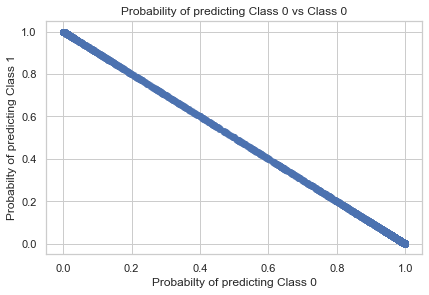

In [72]:
fig, ax = plt.subplots()
plt.scatter(svm_rbf_probs[:,0], svm_rbf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [73]:
count = 0
for val in svm_rbf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_rbf_probs[:,1])}")

0.7814776794195267
0.7668787416468097
0.29929905255648265
0.3995555625533725
0.42783741446991147
0.5449374748057072
0.5611458180856238
0.23000820904712538
0.7165444853901082
0.30023251284599994
0.7161535135433528
0.7989809701502001
0.5686504381033065
0.6156062817541792
0.3867829620393174
0.5933443639441685
0.3183458157666849
0.4706397407287157
0.7550233614143842
0.5511579552910975
0.6866967231416238
0.7833495401243022
0.2615392884208686
0.5542740906980826
0.6396923578326964
0.354107928648771
0.6360354906620803
0.6172473148602584
0.7782557680069225
0.7041168232640046
0.6766796257790373
0.6289879979878694
0.24470970094838712
0.44916795061368386
0.5092340230119504
0.7986782056810394
0.5132736832403788
0.5151641656071504
0.6338157664612405
0.4413860899072237
0.508563217452142
0.5173447119095883
0.5190581043066753
0.6107471164527462
0.49750034752896877
0.4752619498706492
0.44290489697197144
0.37264006688759493
0.6276866712087154
0.34974248783603723
0.739333816256543
0.5391602407409781
0.432

In [74]:
count = 0
for val in svm_rbf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_rbf_probs[:,1])}")

0.9994100017254339
0.9978912887137671
1.0
1.0
0.9997548883006018
1.0
1.0
0.9113564628907194
1.0
0.9999999999999574
0.9997885463863005
1.0
0.999998744602862
1.0
1.0
1.0
0.9993280126042207
0.9806966708194085
0.9766917028975918
0.9999797804485998
1.0
0.9999997151505561
0.9999994127574344
0.9999007613321373
0.9872449277394658
0.9792793440625522
0.9999999999999716
1.0
0.9987038269103804
1.0
0.9999999999997016
0.9990318008423219
0.9955210745729145
1.0
0.9929113832595194
1.0
0.9999999999985363
0.9999999633349226
0.9999980964008159
0.9976235721346872
0.996262141069254
0.9999796009663788
0.9999999999332729
0.9996939657006568
1.0
0.9173957261125673
1.0
0.9999916376224496
0.9952418872331399
0.9434266891473988
0.9999999990564987
0.9987117118632545
1.0
0.9999999999985292
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9518724203074795
1.0
1.0
1.0
1.0
0.9720933895217299
0.9388110810885327
1.0
1.0
0.9908795829582276
1.0
0.9999996304570019
0.9999999994008917
0.9454313484920117
1.0
0.9999999997705942
1.0
1.0
1.0

### LinearSVC

In [ ]:
%%time
from sklearn.svm import LinearSVC

clf_svm_lin = LinearSVC(
#                         probability=True,
                         verbose=2,
                         random_state=42,)

clf_svm_lin.fit(X_train,y_train)

In [ ]:
%%time
clf_svm_lin.score(X_test,y_test)

%%time
from sklearn.model_selection import cross_val_score

clf_svm_lin_cvs = cross_val_score(clf_svm_lin, X, y, 
                              cv=10, 
                              n_jobs=-1,)

print(f"GaussianNB 10-CV score: {clf_svm_lin_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_lin_cvs)}")

In [ ]:
svm_lin_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(svm_lin_probs[:,0])}, max of right col = {max(svm_lin_probs[:,1])}")
print(f"max of left col = {max(svm_lin_probs[:,0])}, min of right col = {min(svm_lin_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(svm_lin_probs[:,0], svm_lin_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in svm_lin_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_lin_probs[:,1])}")

In [ ]:
count = 0
for val in svm_lin_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_lin_probs[:,1])}")

### Classifier 4: Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )

clf_rdf.fit(X_train,y_train)

Wall time: 1.52 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
%%time
clf_rdf.score(X_test,y_test)

Wall time: 110 ms


0.7140011191941802

In [78]:
# %%time
# from sklearn.model_selection import cross_val_score

# clf_rdf_cvs = cross_val_score(clf_rdf, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_rdf_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_rdf_cvs)}")

In [92]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train,y_train)

clf_rdf_predicted = clf_rdf.predict(X_test)
clf_rdf_precision = precision_score(y_test, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test, y_test)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.7140011191941802
Precision Score: 0.5514511873350924
Recall Score: 0.3372203887055372
F1 Score: 0.41851363036453826
Wall time: 1.78 s


In [79]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_10k,y_train_10k)

clf_rdf_predicted = clf_rdf.predict(X_test_10k)
clf_rdf_precision = precision_score(y_test_10k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_10k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_10k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.6448
Precision Score: 0.6718266253869969
Recall Score: 0.6516516516516516
F1 Score: 0.6615853658536585
Wall time: 464 ms


In [80]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_50k,y_train_50k)

clf_rdf_predicted = clf_rdf.predict(X_test_50k)
clf_rdf_precision = precision_score(y_test_50k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_50k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_50k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.70912
Precision Score: 0.6398537477148081
Recall Score: 0.520501380922031
F1 Score: 0.5740393626991567
Wall time: 697 ms


In [81]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_100k,y_train_100k)

clf_rdf_predicted = clf_rdf.predict(X_test_100k)
clf_rdf_precision = precision_score(y_test_100k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_100k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_100k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.7056
Precision Score: 0.6030009377930603
Recall Score: 0.4445724821387416
F1 Score: 0.5118068453170602
Wall time: 1.05 s


In [82]:
rdf_probs = GNB.predict_proba(X_test)

In [83]:
print(f"min of left col = {min(rdf_probs[:,0])}, max of right col = {max(rdf_probs[:,1])}")
print(f"max of left col = {max(rdf_probs[:,0])}, min of right col = {min(rdf_probs[:,1])}")

min of left col = 0.0, max of right col = 1.0
max of left col = 0.9989414359562019, min of right col = 0.001058564043800917


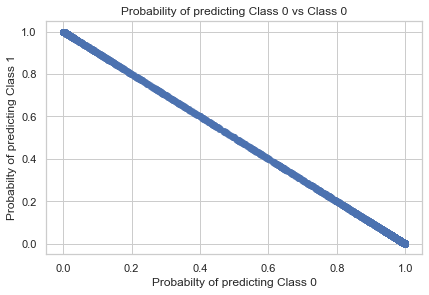

In [84]:
fig, ax = plt.subplots()
plt.scatter(rdf_probs[:,0], rdf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [85]:
count = 0
for val in rdf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(rdf_probs[:,1])}")

0.7814776794195267
0.7668787416468097
0.29929905255648265
0.3995555625533725
0.42783741446991147
0.5449374748057072
0.5611458180856238
0.23000820904712538
0.7165444853901082
0.30023251284599994
0.7161535135433528
0.7989809701502001
0.5686504381033065
0.6156062817541792
0.3867829620393174
0.5933443639441685
0.3183458157666849
0.4706397407287157
0.7550233614143842
0.5511579552910975
0.6866967231416238
0.7833495401243022
0.2615392884208686
0.5542740906980826
0.6396923578326964
0.354107928648771
0.6360354906620803
0.6172473148602584
0.7782557680069225
0.7041168232640046
0.6766796257790373
0.6289879979878694
0.24470970094838712
0.44916795061368386
0.5092340230119504
0.7986782056810394
0.5132736832403788
0.5151641656071504
0.6338157664612405
0.4413860899072237
0.508563217452142
0.5173447119095883
0.5190581043066753
0.6107471164527462
0.49750034752896877
0.4752619498706492
0.44290489697197144
0.37264006688759493
0.6276866712087154
0.34974248783603723
0.739333816256543
0.5391602407409781
0.432

In [86]:
count = 0
for val in rdf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(rdf_probs[:,1])}")

0.9994100017254339
0.9978912887137671
1.0
1.0
0.9997548883006018
1.0
1.0
0.9113564628907194
1.0
0.9999999999999574
0.9997885463863005
1.0
0.999998744602862
1.0
1.0
1.0
0.9993280126042207
0.9806966708194085
0.9766917028975918
0.9999797804485998
1.0
0.9999997151505561
0.9999994127574344
0.9999007613321373
0.9872449277394658
0.9792793440625522
0.9999999999999716
1.0
0.9987038269103804
1.0
0.9999999999997016
0.9990318008423219
0.9955210745729145
1.0
0.9929113832595194
1.0
0.9999999999985363
0.9999999633349226
0.9999980964008159
0.9976235721346872
0.996262141069254
0.9999796009663788
0.9999999999332729
0.9996939657006568
1.0
0.9173957261125673
1.0
0.9999916376224496
0.9952418872331399
0.9434266891473988
0.9999999990564987
0.9987117118632545
1.0
0.9999999999985292
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9518724203074795
1.0
1.0
1.0
1.0
0.9720933895217299
0.9388110810885327
1.0
1.0
0.9908795829582276
1.0
0.9999996304570019
0.9999999994008917
0.9454313484920117
1.0
0.9999999997705942
1.0
1.0
1.0

## Reappending the prediction probabilites after Gaussian NB back on X_test, to observe some behavior

1. Add predicts back on to new dataframe with X_test
2. use clf to parse for feature importance

In [ ]:
X_test_probs = X_test.copy()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_predicted = GNB.predict(X_test)

X_test_probs['prob_0'] = GNB_probs[:,0]
X_test_probs['prob_1'] = GNB_probs[:,1]
X_test_probs['predict_class'] = GNB.predict(X_test)
X_test_probs['label'] = y_test
X_test_probs

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test_probs['views'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Predicted Classes')
# ax.legend()

plt.show()

In [ ]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['comment_count'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Comment Count to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Comment Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

In [ ]:
GNB.feature_log_prob_

In [ ]:
X_test_probs

In [ ]:
# to first affirm that prob_0 and prob_1 were truly labeled as what they were supposed to be

count = 0
for i, row in X_test_probs.iterrows():
    count += 1
    if count > 5:
        break
    print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
    print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')

In [ ]:
count = 0
for i, row in X_caltest_probs.iterrows():
    if 0.65 > row.prob_0 > 0.45:
        count += 1
        print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
        print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')
        
print(f'\nCount = {count}')

### Other observations

In [ ]:
len(X_test)

In [ ]:
np.array(X_test[19:20])

In [ ]:
y_test[19:20]

In [ ]:
GNB.predict_proba(X_test[:-1])

In [ ]:
GNB.predict(X_test[5::-1])

In [ ]:
# custom 
print(GNB.predict(np.array([[17158579, 787425, 43420, 125882]])))
print(GNB.predict_proba(np.array([[17158579, 787425, 43420, 125882]])))

In [ ]:
# custom 
arr2 = [4567, 787, 430, 125]
print(GNB.predict(np.array([arr2])))
print(GNB.predict_proba(np.array([arr2])))

### Using only views, comments, and likes to graph 3D

In [ ]:
X3 = X.drop(['dislikes'],axis=1)
X3

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=42)

In [ ]:
X3_train

In [ ]:
y3_train

### Gaussian Naive Bayes on views, comments, likes, only

In [ ]:
GNB_3 = GaussianNB()
GNB_3.fit(X3_train, y3_train)

In [ ]:
GNB_3.score(X3_test, y3_test)

In [ ]:
from sklearn.model_selection import cross_val_score

GNB_3_cvs = cross_val_score(GNB_3, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(GNB_3_cvs)
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_3_cvs)}")

### Bernoulli Naive Bayes on 4 stats, then the 3 stats

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

In [ ]:
BNB.score(X_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X3_train, y_train)

In [ ]:
BNB.score(X3_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

### Random Forest Classifier on 4 stats, looking at feature importance

In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
%%time
rf_clf.score(X_test,y_test)

## Taking a look at feature importance from Random Forest

In [ ]:
# quick investigation into the correlation of features to the label
df_nostr.corr()["trend_over_5_days"].sort_values(ascending=False)

In [ ]:
rf_clf.feature_importances_

In [ ]:
plt.barh(X.columns, rf_clf.feature_importances_)

In [ ]:
%%time
import shap

explainer = shap.TreeExplainer(rf_clf)

In [ ]:
%%time
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shape_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shape_values, X_train)

In [ ]:
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(probability=True)
# clf.fit(X, y) 
# print(clf.predict([[-0.8, -1]]))
# print(clf.predict_proba([[-0.8, -1]]))

### Heat Map remade with Spearman's rank correlation 

In [ ]:
import seaborn as sns

sns.heatmap(df_nostr.corr(method='spearman'),annot=True,cmap='coolwarm')

In [ ]:
sns.heatmap(df_nostr.corr(method='pearson'),annot=True,cmap='coolwarm_r')

In [ ]:
df_nostr.corr(method='pearson')['trend_over_5_days']